In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

pd.options.mode.chained_assignment = None  # default='warn'

filefolder = 'anonymisedData/'

In [2]:
plot_params = {'legend.fontsize': 'x-large',
               'figure.figsize': (10, 8),
               'axes.labelsize': 'x-large',
               'axes.titlesize': 'x-large',
               'xtick.labelsize': 'x-large',
               'ytick.labelsize': 'x-large'}
for param, value in plot_params.items():
    mpl.rcParams[param] = value

# Load Data

In [4]:
asmt_df = pd.read_csv(filefolder + 'assessments.csv')
print('Loaded asmt_df: length', len(asmt_df))
asmt_df.head()

Loaded asmt_df: length 206


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [5]:
courses_df = pd.read_csv(filefolder + 'courses.csv')
print('Loaded courses_df: length', len(courses_df))
courses_df.head()

Loaded courses_df: length 22


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
stu_asmt_df = pd.read_csv(filefolder + 'studentAssessment.csv')
print('Loaded stu_asmt_df: length', len(stu_asmt_df))
stu_asmt_df.head()

Loaded stu_asmt_df: length 173912


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
stu_info_df = pd.read_csv(filefolder + 'studentInfo.csv')
print('Loaded stu_info_df: length', len(stu_info_df))
stu_info_df.head()

Loaded stu_info_df: length 32593


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
stu_reg_df = pd.read_csv(filefolder + 'studentRegistration.csv')
print('Loaded stu_reg_df: length', len(stu_reg_df))
stu_reg_df.head()

Loaded stu_reg_df: length 32593


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [9]:
stu_vle_df = pd.read_csv(filefolder + 'studentVle.csv')
print('Loaded stu_vle_df: length', len(stu_vle_df))
stu_vle_df.head()

Loaded stu_vle_df: length 10655280


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [10]:
vle_df = pd.read_csv(filefolder + 'vle.csv')
print('Loaded vle_df: length', len(vle_df))
vle_df.head()

Loaded vle_df: length 6364


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## Functions and dicts for linking tables

In [11]:
id_site_to_activity = pd.Series(vle_df['activity_type'].values, index=vle_df['id_site']).to_dict()

In [12]:
stu_info_columns = ['final_result', 'age_band']
stu_info_dict = pd.DataFrame(stu_info_df[stu_info_columns].values, columns=stu_info_columns,
                             index=stu_info_df['id_student']).to_dict()

In [13]:
asmt_columns = ['code_module', 'code_presentation', 'weight']
asmt_dict = pd.DataFrame(asmt_df[asmt_columns].values, columns=asmt_columns,
                         index=asmt_df['id_assessment']).to_dict()

# Exploration
Explore how the student interaction (number of clicks) relates to the final performance of the student. Does this depend on the type of course? (Social Sciences vs STEM)

### Table of student performance
Each row represents a unique student - course - session combination.

In [14]:
for col in asmt_columns:
    stu_asmt_df[col] = stu_asmt_df['id_assessment'].map(asmt_dict[col])
stu_asmt_df['weighted_score'] = stu_asmt_df['score'] * stu_asmt_df['weight']
scores = stu_asmt_df.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False).agg(
    {'weight': 'sum', 'weighted_score': 'sum'})
scores['final_score'] = scores['weighted_score'] / scores['weight']
scores.head()

,id_student,code_module,code_presentation,weight,weighted_score,final_score
0,6516,AAA,2014J,100.0,6350.0,63.50
1,8462,DDD,2013J,40.0,3490.0,87.25
2,8462,DDD,2014J,50.0,4300.0,86.00
3,11391,AAA,2013J,100.0,8240.0,82.40
4,23629,BBB,2013B,25.0,1669.0,66.76


Add score columns to student info table

In [15]:
stu_info_df = stu_info_df.merge(scores[['id_student', 'code_module', 'code_presentation',
                                        'final_score', 'weighted_score']],
                                on=['id_student', 'code_module', 'code_presentation'])
stu_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_score,weighted_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,8240.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,6540.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,7630.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,5500.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,6690.0


Select certain modules of interest.

- BBB is a social sciences module.
- DDD is a STEM module.

In [17]:
modules = ['BBB', 'DDD']
df_slice = stu_vle_df[stu_vle_df['code_module'].isin(modules)]
len(df_slice)

3734050

Get the total number of clicks per activity type, along with the overall performance, for each student in each module session.

In [18]:
id_ = ['id_student', 'code_module', 'code_presentation'] # Common identifier
clicks = df_slice.groupby(id_ + ['id_site'], as_index=False).agg({'sum_click': 'sum'})
clicks['activity_type'] = clicks['id_site'].map(id_site_to_activity)
activity_clicks = clicks.groupby(id_ + ['activity_type'], as_index=False).agg({'sum_click': 'sum'})
# activity_clicks = clicks
for col in stu_info_columns:
    activity_clicks[col] = activity_clicks['id_student'].map(stu_info_dict[col])
result_dict = {'Pass': 'Pass', 'Distinction': 'Pass', 'Fail': 'Fail'}
activity_clicks['final_result'] = activity_clicks['final_result'].map(result_dict)
activity_clicks = activity_clicks.merge(scores[id_ + ['final_score', 'weighted_score']], on=id_)
activity_clicks = activity_clicks.dropna()
activity_clicks.head()

,id_student,code_module,code_presentation,activity_type,sum_click,final_result,age_band,final_score,weighted_score
12,23629,BBB,2013B,forumng,87,Fail,0-35,66.76,1669.0
13,23629,BBB,2013B,homepage,36,Fail,0-35,66.76,1669.0
14,23629,BBB,2013B,quiz,31,Fail,0-35,66.76,1669.0
15,23629,BBB,2013B,resource,2,Fail,0-35,66.76,1669.0
16,23629,BBB,2013B,subpage,5,Fail,0-35,66.76,1669.0


Find the median clicks in each module for a given activity type -- in this case, "oucontent"

In [21]:
group_param = 'code_module'
activity_type = 'oucontent'
avg_clicks = activity_clicks[activity_clicks['activity_type']==activity_type].groupby(
    group_param).agg({'sum_click': 'median'})
avg_clicks = avg_clicks.dropna()
avg_clicks_dict = avg_clicks.to_dict()['sum_click']
avg_clicks

,sum_click
code_module,
BBB,25
DDD,113


Function to obtain the average clicks over all students grouped by similar final results.

In [22]:
# Average clicks & score, banded by final score
def banded(df, n=100, x_param='sum_click', y_param='weighted_score'):
    ymax = df[y_param].max()
    x = []
    y = []
    for i in range(n):
        y0 = i/n * ymax
        y1 = (i+1)/n * ymax
        df_slice = df[(df[y_param] > y0) & (df[y_param] <= y1)]
        if len(df_slice) > 0:
            x.append(df_slice[x_param].median())
            y.append(df_slice[y_param].median())
    return x, y

BBB 0.936721079067
DDD 0.929092383079


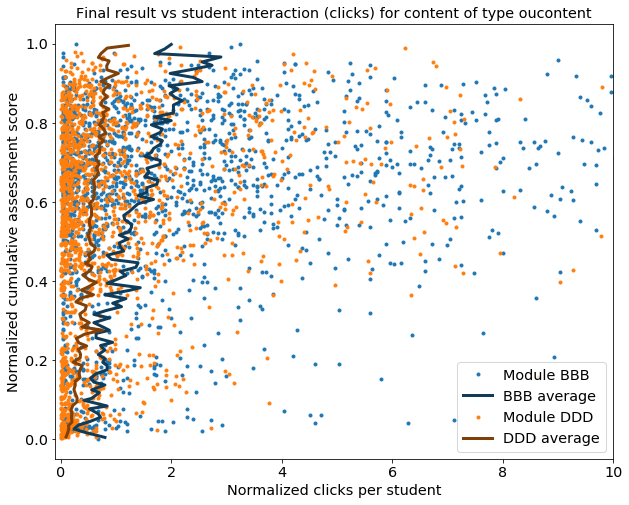

In [24]:
plot_set = avg_clicks.index.values
leg = []
for i, g in enumerate(plot_set):
    clicks_slice = activity_clicks[activity_clicks[group_param] == g]
    ymax = clicks_slice['weighted_score'].max()
    
    clicks_slice_rand = clicks_slice.sample(frac=0.05)
    x = clicks_slice_rand['sum_click'] / avg_clicks_dict[g]
    y = clicks_slice_rand['weighted_score'] / ymax
    scatter = plt.plot(x, y, '.', zorder=0)
    leg.append('Module ' + g)
    clr = scatter[0].get_color()
    clr = [int(clr[i:i+2], 16) for i in range(1,6,2)]
    
    x_banded, y_banded = banded(clicks_slice)
    x_banded = x_banded / avg_clicks_dict[g]
    y_banded = y_banded / ymax
    plt.plot(x_banded, y_banded, '-', linewidth=3, color=[0.5*c/255 for c in clr], zorder=10)
    leg.append(g + ' average')
    
    print(g, stats.linregress(x_banded, y_banded).rvalue)

plt.xlim([-.1, 10])
plt.title('Final result vs student interaction (clicks) for content of type ' + activity_type)
plt.xlabel('Normalized clicks per student')
plt.ylabel('Normalized cumulative assessment score')
plt.legend(leg)
plt.show()